# Market Research and Recommendation for Business Decision Making

- No
- Row_Num
- Customer_ID
- Product
- First_Transaction
- Last_Transaction
- Average_Transaction_Amount
- Count_Transaction

# 1. Data Preparation and Inspection

In [1]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [2]:
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None


## 1.1 Data Cleaning
Mengubah dua kolom (First and Last Transaction) yang menunjukkan terjadinya transaksi agar bertipe datetime.

In [3]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


In [4]:
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


## 1.2 Churn Customers

Pertama, menentukan churn customers sesuai definisi yang telah diberikan:
- transaksi paling terakhir kapan dilakukan
- mengklasifikasi mana customer yang berstatus churn dan mana yang tidak.

In [5]:
# Pengecekan transaksi terakhir dalam dataset
print('Transaksi terakhir dilakukan pada:', df['Last_Transaction'].max())

# Menentukan tanggal cut-off (6 bulan sebelum transaksi terakhir)
cut_off_date = df['Last_Transaction'].max() - pd.DateOffset(months=6)

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] < cut_off_date, 'is_churn'] = True
df.loc[df['Last_Transaction'] >= cut_off_date, 'is_churn'] = False

print('Lima data teratas:')
df.head()

Transaksi terakhir dilakukan pada: 2019-02-01 23:57:57.286000013
Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


In [6]:
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB
None


## 1.3 Menghapus kolom yang tidak diperlukan
Menghapus kolom yang tidak diperlukan:

In [7]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# 2. Data Visualization Insight

## 2.1 Customer acquisition by year
Membuat visualisasi data berupa trend of customer acquisition by year dengan meggunakan bar chart untuk menghitung jumlah customer tiap tahunnya.

   Year_First_Transaction  Counts
0                    2013    1007
1                    2014    4954
2                    2015   11235
3                    2016   17656
4                    2017   31828
5                    2018   30327
6                    2019    2993


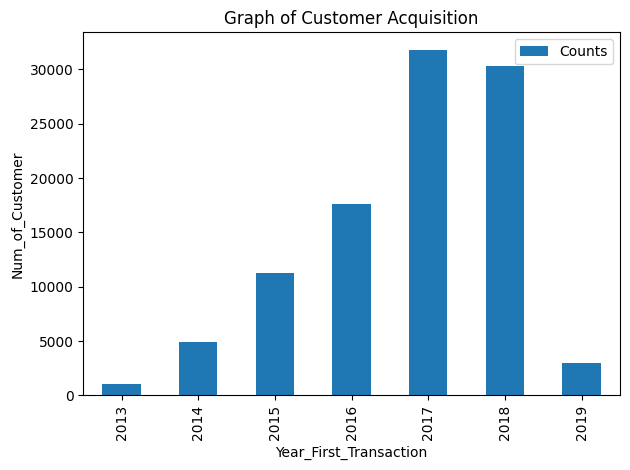

In [8]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count().reset_index(name='Counts')
print(df_year)

df_year.plot(x='Year_First_Transaction', y='Counts', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## 2.2 Transaction by Year

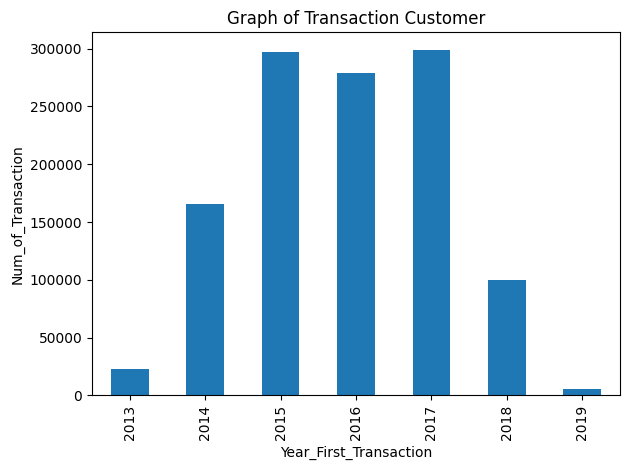

In [9]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

## 2.3 Average transaction amount by year

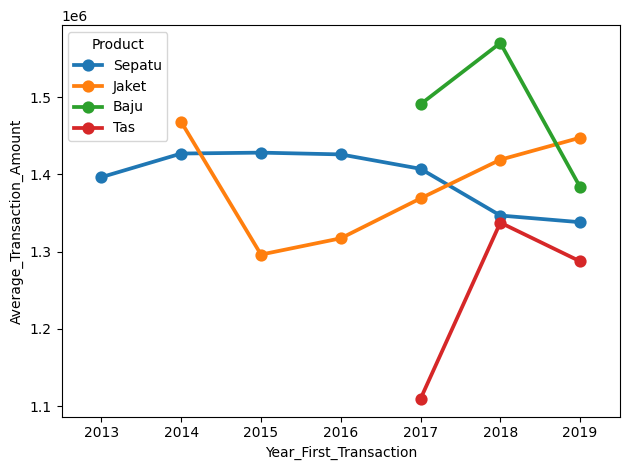

In [10]:
import seaborn as sns

plt.clf()
# Mengelompokkan data berdasarkan Tahun Transaksi Pertama dan Produk, lalu menghitung rata-rata jumlah transaksi
avg_transaction_per_year = df.groupby(['Year_First_Transaction', 'Product'])['Average_Transaction_Amount'].mean().reset_index()

# Menggunakan seaborn pointplot untuk menampilkan tren rata-rata jumlah transaksi per produk tiap tahun
sns.pointplot(data=avg_transaction_per_year,
			  x='Year_First_Transaction',
			  y='Average_Transaction_Amount',
			  hue='Product')
plt.tight_layout()
plt.show()

## 2.4 Proporsi churned customer untuk setiap produk
Memvisualisasikan pie chart untuk melihat dari sisi churned customer seberapa besar proporsi churned customer untuk tiap-tiap produk.

<Figure size 640x480 with 0 Axes>

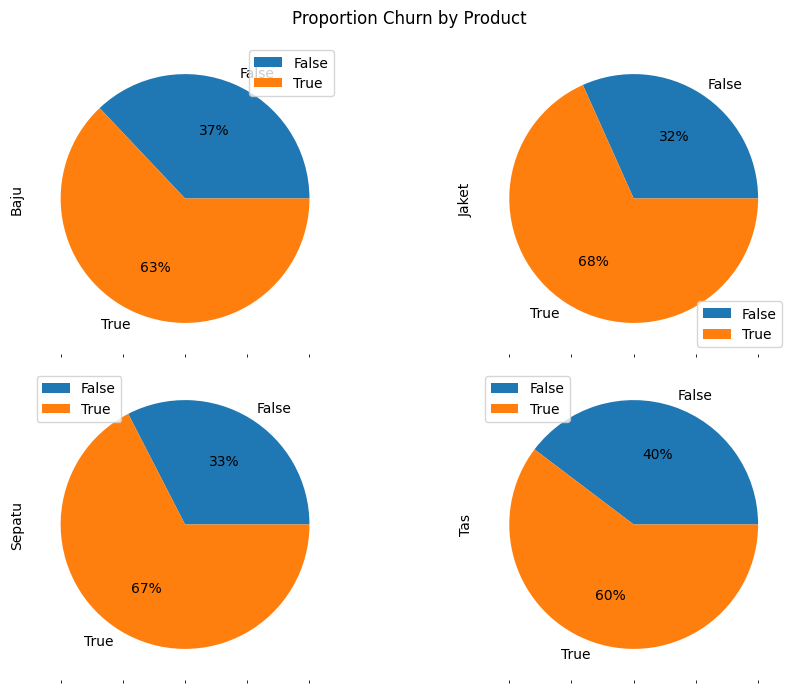

In [11]:
plt.clf()
# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
						columns='Product',
						values='Customer_ID',
						aggfunc='count',
						fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
				figsize=(10, 7),
				layout=(-1, 2),
				autopct='%1.0f%%',
				title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

## 2.5 Distribusi kategorisasi count transaction
Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:

Rentang jumlah transaksi	Kategori

0 s/d 1	= 1

2 s/d 3	= 2 - 3

4 s/d 6	= 4 - 6

7 s/d 10	7 - 10

*> 10	= > 10


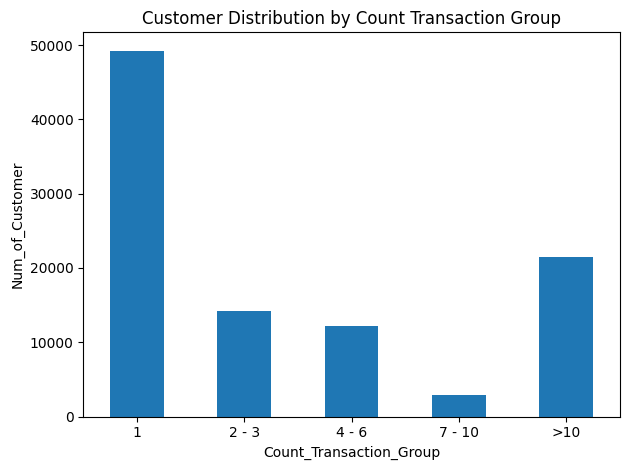

In [12]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1'
	elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
		val ='2 - 3'
	elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
		val ='4 - 6'
	elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
		val ='7 - 10'
	else:
		val ='>10'
	return val

# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group',
			 y='Customer_ID',
			 kind='bar',
			 title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2.6 Distribusi kategorisasi average transaction amount

visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi berikut:

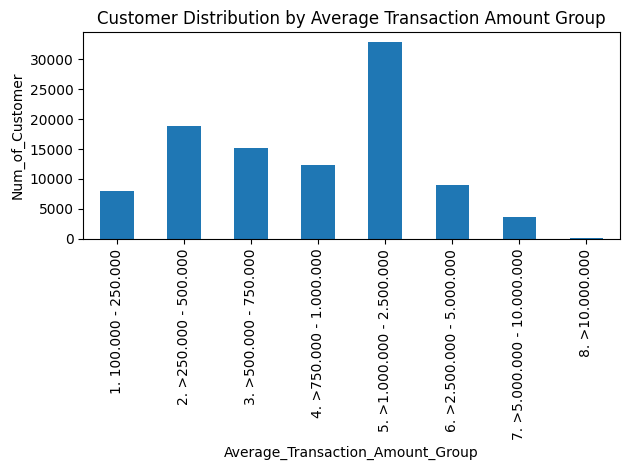

In [13]:
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
	if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
		val ='1. 100.000 - 250.000'
	elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
		val ='2. >250.000 - 500.000'
	elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
		val ='3. >500.000 - 750.000'
	elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
		val ='4. >750.000 - 1.000.000'
	elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
		val ='5. >1.000.000 - 2.500.000'
	elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
		val ='6. >2.500.000 - 5.000.000'
	elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
		val ='7. >5.000.000 - 10.000.000'
	else:
		val ='8. >10.000.000'
	return val

# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group',
			 y='Customer_ID',
			 kind='bar',
			 title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# 3. Modelling

## 3.1 Feature Columns and Target Variable
Menentukan feature-feature dari dataset yang merupakan indikator churn seorang pelanggan, yaitu: `Average_Transaction_Amount`, `Count_Transaction`, dan `Year_Diff` yang merupakan rentang pembelian awal dan terakhir customer. Serta target variable yang di-assign adalah kondisi customer churn atau tidak sebagaimana akan dianalisis penyebab churn seseorang.

In [14]:
# Mengonversi kolom 'is_churn' menjadi tipe boolean
df['is_churn'] = df['is_churn'].astype(bool)

# Periksa kembali lima data teratas
print('Lima data teratas setelah konversi:')
df.head()

Lima data teratas setelah konversi:


,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False,2016,2018,>10,5. >1.000.000 - 2.500.000
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False,2014,2018,>10,5. >1.000.000 - 2.500.000
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,>10,2. >250.000 - 500.000
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False,2017,2019,>10,3. >500.000 - 750.000
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False,2015,2018,>10,5. >1.000.000 - 2.500.000


In [15]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]

# Target variable
y = df['is_churn']

## 3.2 Splitting Datase

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 3.3 Multi Model Training

In [17]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import scikit-learn models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Import XGBoost, LGBM, and CatBoost models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LGBM': LGBMClassifier(random_state=42),
}

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Training and evaluating Logistic Regression...
Accuracy: 0.7649
Precision: 0.7632
Recall: 0.9399
F1 Score: 0.8424


<Figure size 640x480 with 0 Axes>

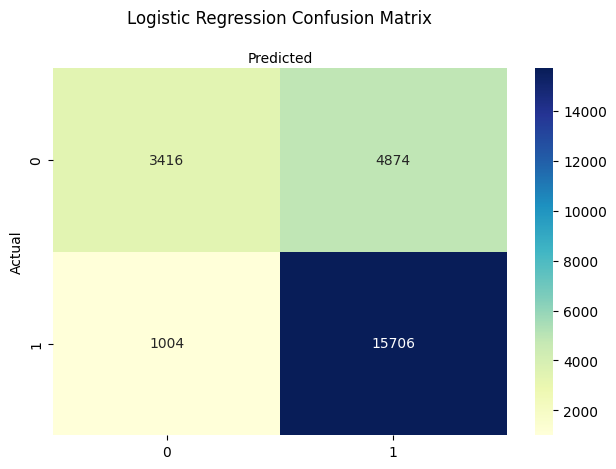


Training and evaluating Gradient Boosting...
Accuracy: 0.7732
Precision: 0.7744
Recall: 0.9323
F1 Score: 0.8460


<Figure size 640x480 with 0 Axes>

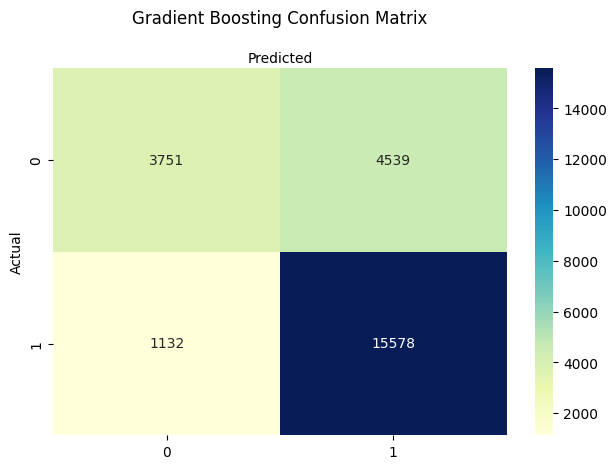


Training and evaluating XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:29:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7713
Precision: 0.7732
Recall: 0.9308
F1 Score: 0.8447


<Figure size 640x480 with 0 Axes>

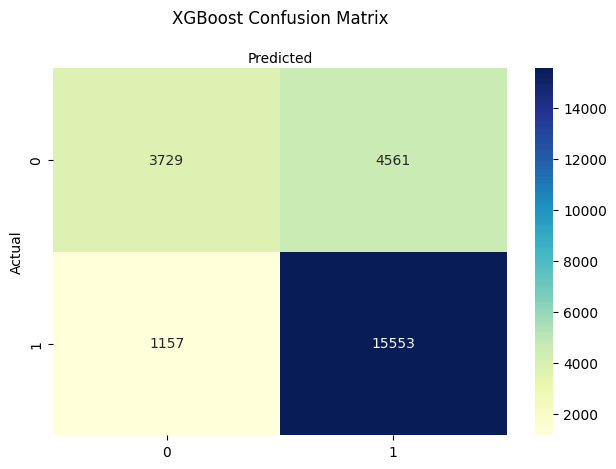


Training and evaluating LGBM...
[LightGBM] [Info] Number of positive: 49991, number of negative: 25009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666547 -> initscore=0.692607
[LightGBM] [Info] Start training from score 0.692607
Accuracy: 0.7728
Precision: 0.7743
Recall: 0.9317
F1 Score: 0.8457


<Figure size 640x480 with 0 Axes>

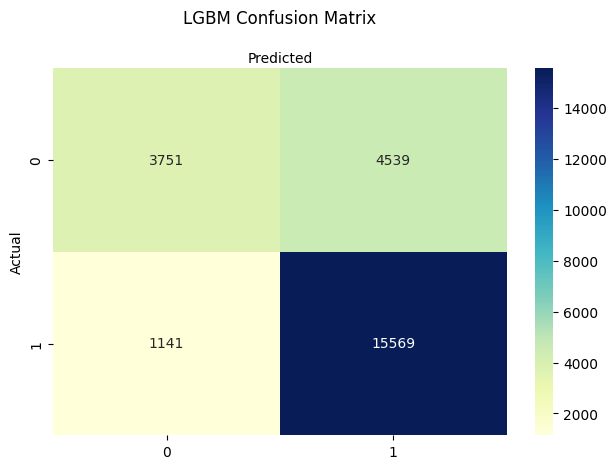

In [23]:
results = []

# Loop through each model
for model_name, model in models.items():
    print("\n" + "="*40)
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict the test set results
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.clf()
    class_names = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
    ax.xaxis.set_label_position('top')
    plt.title(f'{model_name} Confusion Matrix', y=1.1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

### 3.3.1 Finding The Best Model

In [28]:
# Buat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(results)

# Tampilkan DataFrame
results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
1,Gradient Boosting,0.77316,0.774370,0.932256,0.846010
3,LGBM,0.77280,0.774269,0.931718,0.845728
2,XGBoost,0.77128,0.773243,0.930760,0.844721
0,Logistic Regression,0.76488,0.763168,0.939916,0.842371


### 3.3.2 Hyperparameter Tuning

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# Definisikan parameter yang ingin dicoba
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}

# Inisialisasi model Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist,
                                   scoring='accuracy', n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42)

# Fit Randomized Search CV
random_search.fit(X_train, y_train)

# Hasil terbaik
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.01}
Best cross-validation score: 0.77


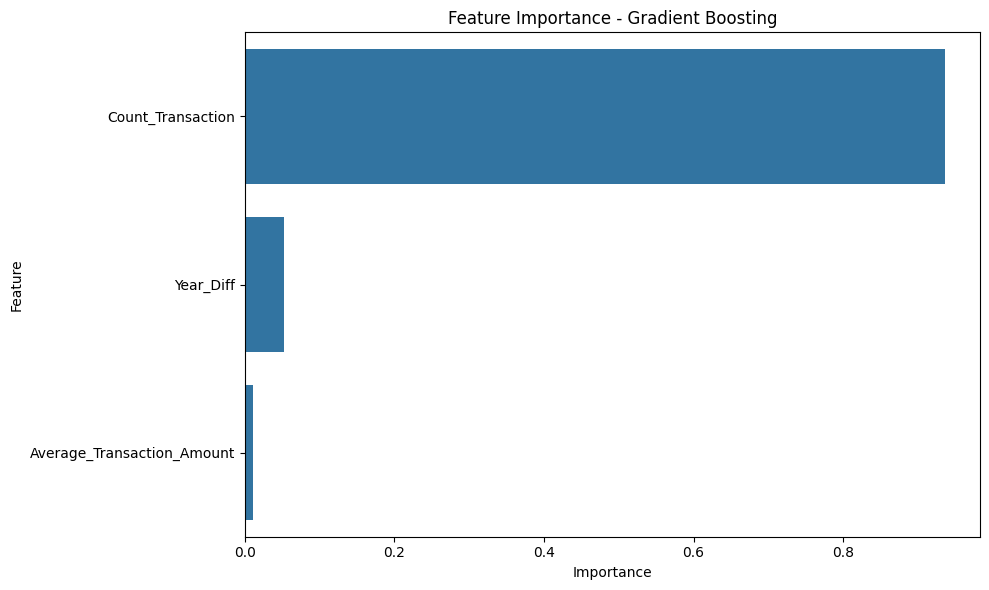

In [20]:
# Model terbaik
best_gb = random_search.best_estimator_

# Mendapatkan feature importance
feature_importances = best_gb.feature_importances_

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [21]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.8 MB/s eta 0:00:00


 99%|===================| 24766/25000 [01:05<00:00]       

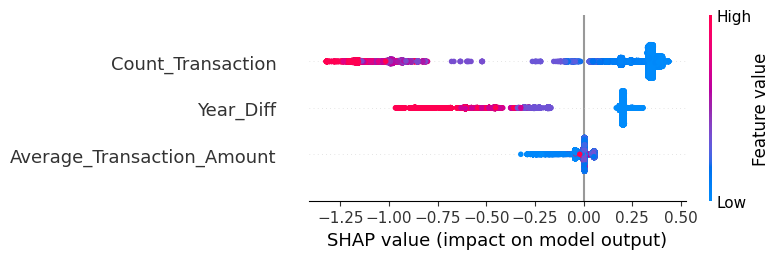

In [22]:
import shap

# Membuat objek explainer
explainer = shap.Explainer(best_gb, X_train)
shap_values = explainer(X_test)

# Visualisasi summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=feature_columns)


# Kesimpulan
## Interpretasi Fitur
Berdasarkan hasil analisis Feature Importance dan SHAP values, berikut adalah interpretasi dari masing-masing fitur utama yang memengaruhi churn:

1. `Count_Transaction`: Fitur ini menunjukkan jumlah transaksi yang dilakukan oleh pelanggan. Ini adalah faktor yang paling berpengaruh dalam menentukan apakah pelanggan akan churn atau tidak. Nilai SHAP menunjukkan bahwa pelanggan dengan jumlah transaksi rendah cenderung memiliki peluang churn yang lebih tinggi, yang berarti keterlibatan pelanggan dalam pembelian secara langsung berkaitan dengan retensi.

2. `Year_Diff`: Fitur ini menunjukkan selisih waktu antara transaksi terakhir dengan waktu terkini. Pelanggan yang memiliki nilai Year_Diff lebih tinggi, atau semakin lama sejak transaksi terakhir mereka, cenderung lebih besar kemungkinan untuk churn. Ini menunjukkan bahwa pelanggan yang tidak aktif dalam jangka waktu lama berpotensi untuk meninggalkan toko.

3. `Average_Transaction_Amount`: Meskipun tidak sekuat fitur lainnya, rata-rata jumlah transaksi per pelanggan juga berkontribusi dalam prediksi churn. Pelanggan dengan rata-rata transaksi lebih rendah cenderung memiliki peluang yang sedikit lebih tinggi untuk churn, yang berarti total belanja rata-rata per transaksi juga perlu diperhatikan.

## Rekomendasi Bisnis dalam Mengatasi Permasalahan Churn
Berdasarkan interpretasi dan kesimpulan di atas, berikut adalah beberapa rekomendasi untuk mengurangi churn dan meningkatkan retensi pelanggan di DQLab Sport Center:

1. Strategi Meningkatkan Frekuensi Pembelian `Count_Transaction`:
Pelanggan dengan frekuensi transaksi lebih rendah memiliki risiko churn lebih tinggi. Manajer dapat mengimplementasikan program loyalitas atau reward untuk mendorong pembelian berulang.
Contoh Implementasi: Program loyalty dengan poin atau diskon bagi pelanggan yang melakukan transaksi rutin dalam periode tertentu.

2. Penawaran Khusus untuk Pelanggan Lama `Year_Diff`:
Berikan penawaran khusus atau diskon kepada pelanggan yang sudah lama tidak melakukan transaksi untuk mendorong mereka berbelanja kembali.
Contoh Implementasi: Kirimkan kampanye win-back berupa voucher diskon kepada pelanggan yang tidak bertransaksi selama lebih dari 6 bulan.

3. Program Upselling atau Bundling untuk Meningkatkan Nilai Transaksi `Average_Transaction_Amount`:
Pelanggan dengan rata-rata nilai transaksi rendah juga berisiko untuk churn. Manajer dapat mencoba strategi upselling atau bundling produk agar pelanggan lebih banyak berbelanja dalam satu kali transaksi.
Contoh Implementasi: Tawarkan paket bundling produk yang relevan atau promosi “Beli 2 Gratis 1” untuk meningkatkan jumlah item per transaksi.

4. Pengingat Transaksi Berkala:
Berdasarkan fitur Year_Diff, pengingat berkala dapat membantu menjaga engagement pelanggan yang jarang bertransaksi.
Contoh Implementasi: Kirimkan pengingat melalui email atau push notification kepada pelanggan yang tidak melakukan transaksi dalam 3-6 bulan terakhir.

5. Visualisasi dan Monitoring Berkala:
Buat dasbor monitoring churn secara berkala untuk memantau tren perubahan dan faktor churn. Visualisasi data ini akan membantu manajer untuk mengambil tindakan preventif lebih awal.
Contoh Implementasi: Visualisasi data churn yang memantau metrik seperti frekuensi transaksi dan nilai rata-rata transaksi untuk membantu tim manajemen dalam membuat keputusan berbasis data.